In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\seunt\Downloads\ML tutorial\datasets\landprice.csv')
df.head()

,Area of Land in Thousand Sq Foot,Price of Land in Million USD
0,91,12.0
1,66,7.0
2,72,8.0
3,73,8.1
4,60,7.0


In [3]:
x = df.iloc[0: , 0]
y = df.iloc[0: , -1]

In [4]:
#x.head()

In [5]:
#y.head()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [7]:
# X-train and Y-train are one dimmensional array, that is they contain only one variable, if we continue, the model.fit will
# not work until we convert it to 2-D array. So we need to use the numpy function to help convert into 2-D array for us to 
# continue. We are going to use the reshape function in numpy. you should be able to remember the numpy.reshape func olodo

In [8]:
X_train.shape

(13,)

In [9]:
#If you want to reshape the data, you should first extract the values from the Pandas Series or DataFrame and then reshape them.

x_train_values = X_train.values
x_test_values = X_test.values
y_train_values = Y_train.values
y_test_values = Y_test.values

# Reshape the values
x_train1 = np.reshape(x_train_values, (-1, 1))
x_test1 = np.reshape(x_test_values, (-1, 1))

y_train1 = np.reshape(y_train_values, (-1, 1))
y_test1 = np.reshape(y_test_values, (-1, 1))

# you remember in the numpy.reshape, one of the argument is to specify the 2-D array you want to convert your 1-D array into
# but since we can't possible be counting the rows, imagine having a million rows, so we specify -1 to tell python to take care
# of the rows itself, and since we have just 1 columnn, we put just 1 for the other one. Hence the reason why we have (-1, 1)
# the -1 is for the rows and the 1 is for the column.

In [10]:
# initiate the Linear Regressor Model

lin_reg = LinearRegression()

# fit the model on the training data

lin_reg.fit(x_train1, y_train1)

LinearRegression()

In [11]:
# now we have successfully trained the simple linear regression model

In [12]:
# now let's test the model with unseen data which is the test data we kept for testing to predict the prices based on the Areas

y_pred = lin_reg.predict(x_test1)

In [13]:
#x_test1

In [14]:
#y_test1

In [15]:
#y_pred

In [16]:
# compairing the results from the prediction that is y_pred and the actual price which is y_test, we can see that the model 
# actually do well because the price are closely related. You can also predict it for the x_train and check it against the 
# the actual price which is y_train. Now we are going to use the R-Squared to judge and use as a metric.

In [17]:
# Now let's visualize the training and testing part on a scatter plot using matplot library

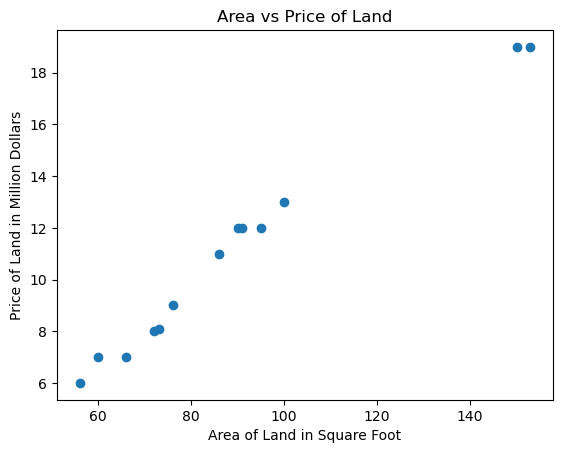

In [18]:
# visualizing the traing data

plt.scatter(x_train1, y_train1, cmap = 'blue')
plt.title('Area vs Price of Land')
plt.xlabel('Area of Land in Square Foot')
plt.ylabel('Price of Land in Million Dollars')

plt.show();

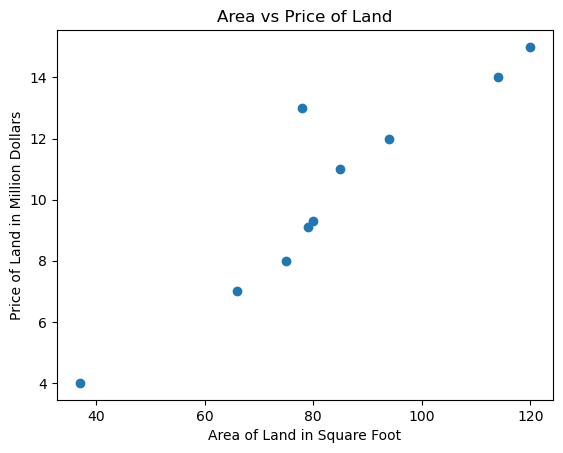

In [19]:
# visualizing the testing data

plt.scatter(x_test1, y_test1, cmap = 'blue')
plt.title('Area vs Price of Land')
plt.xlabel('Area of Land in Square Foot')
plt.ylabel('Price of Land in Million Dollars')

plt.show();

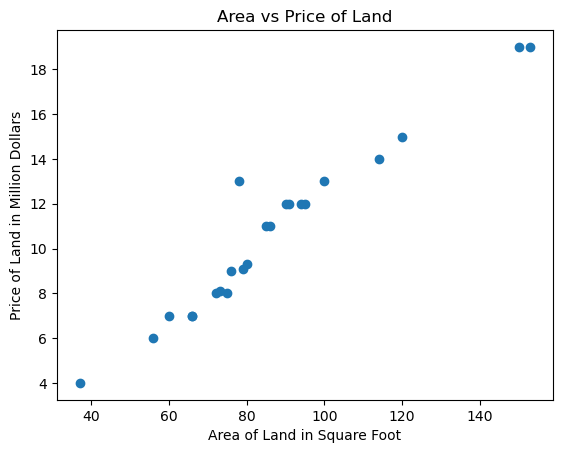

In [20]:
# putting both on the same scatter plot

# visualizing the entire data data

plt.scatter(x, y, cmap = 'blue')
plt.title('Area vs Price of Land')
plt.xlabel('Area of Land in Square Foot')
plt.ylabel('Price of Land in Million Dollars')

plt.show();

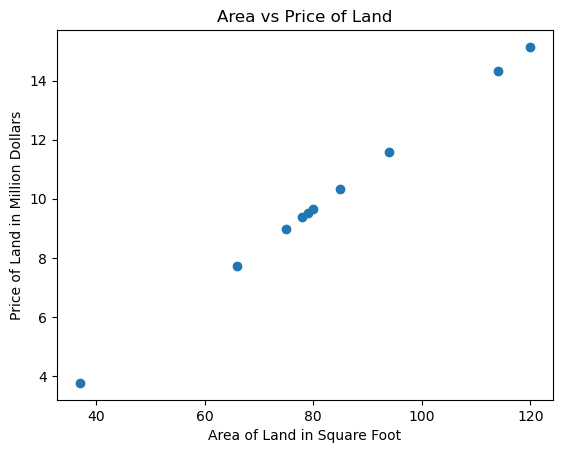

In [21]:
# Let's visualize the testing data which is x_test1 and the model predictions for those test data which is y_pred

plt.scatter(x_test1, y_pred, cmap = 'blue')
plt.title('Area vs Price of Land')
plt.xlabel('Area of Land in Square Foot')
plt.ylabel('Price of Land in Million Dollars')

plt.show();

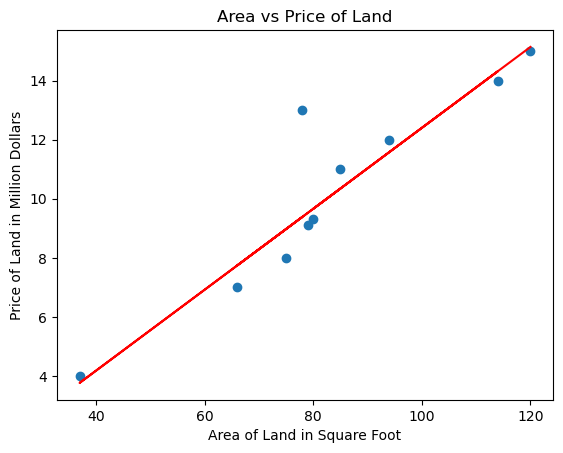

In [22]:
# now let's plot the regression line. remember the regressor line is simply going to be the predicted values
# also remember from the intuiton that the regressor show the difference between the actual price values which is the y_test
# in this case and the predicted price values which is the y_pred

plt.scatter(x_test1, y_test1, cmap = 'blue')
plt.plot(x_test1, y_pred, color = 'red') # this is going to plot the regressor line using the predicted values
plt.title('Area vs Price of Land')
plt.xlabel('Area of Land in Square Foot')
plt.ylabel('Price of Land in Million Dollars')

plt.show();

#### 
- now we can see the regressor line in red which is the predicted price values and the blue dots which are the actual price values
 and we can see from the plot that the difference between the actual prices and the predicted prices (regressor line) are quite
 close

In [23]:
# let's use the model to predict the x_train values and visualize it with the plot as well. we know y_train1 are the actual
# prices of x_train1. so y_pred2 will be the model prediction prices for those areas of land

y_pred2 = lin_reg.predict(x_train1)

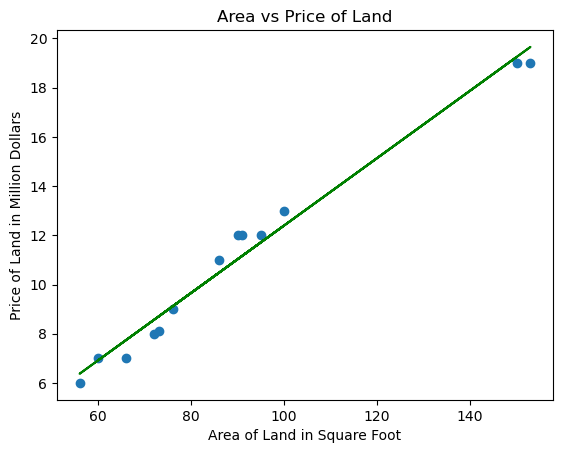

In [24]:
# now let's look at what the regressor line will look like for the training data that is x_train1 and y_train1 which is the
# prices and y_pred2 which is the model prediction prices, note that this will be the regressor line for the plot
plt.scatter(x_train1, y_train1, cmap = 'blue')
plt.plot(x_train1, y_pred2, color = 'green') # this is going to plot the regressor line using the predicted values
plt.title('Area vs Price of Land')
plt.xlabel('Area of Land in Square Foot')
plt.ylabel('Price of Land in Million Dollars')

plt.show();

####
- we can see that again the actual or real values are again close to the regressor line which represent the predicted price
values that the model predicted. This shows that the model is actually doing pretty well.

- You can also see that we do not have the issue of over fitting and under fitting. We will talk more on those two in multiple
linear regression. 

In [25]:
# now we will now find and compute the R-SQUARED Value
# we need to import the r2 score metrics to compute the R-squared value. so go back to the first cell to import it
# we are going to compute the R-square value for the training data and do the thesame for the texting data

# so let's calculate r square value for the training data first

r_square_training = r2_score(y_train1, y_pred2)
r_square_training

0.9801746682609226

In [26]:
# let's calculate r square for the testing data as well

r_square_testing = r2_score(y_test1, y_pred)
r_square_testing

0.8505174170816574

- we can see that the model has an r square value of 0.98 for the training data and 0.85 for the testing data which implies
that the model is good enough and can be deploy to make predictions for future values of price of lands that will be purchase by the company.

In [27]:
# Deployment of the Model: now we are going to build a template for the simple linear regression model. 
# And what this template will do is that it will accept any value of area of land and it will predict the price value
# for the given input (that is, Area).

Area = 70 # (that is 70 K SQ Foot)

# we need to transform area into 2-D array as the model expect a 2-D array instead of 1-D array or scalar input

trans_Area = np.reshape(Area, (1,1)) # 1,1 means that the Area would be able to fit in properly in 1 row and 1 column

pred_price = lin_reg.predict(trans_Area) # passing 'Area' directly here without reshaping it would return erro

pred_price

array([[8.28959937]])

- Now, we can see the prediction of the model, when the Area of the Land is 70 K Sq Foot, the model predicts the Price to be
 8.28959937 Million Dollars.
 
- All we need to do now is to just input any Area of Land the company wants to purchase and the Model will give the prediction.

In [28]:
# Another method for reshaping the 'Area' from 1-D into 2-D
# we are going to use the 'array' method in numpy to do this

Area2 = 150

trans_Area2 = np.array([[Area2]]) # we want a 2-D array, so we use or pass in a two square brackets, then pass in the element
# or the variable


pred_price2 = lin_reg.predict(trans_Area2)

pred_price2

array([[19.24625307]])

In [29]:
# now that our template model is ready and can now predict the price of any given area of land. we can't give the template like
# this in this form, we need a graphical representaion of the whole thing. Let's get into that